<a href="https://colab.research.google.com/github/Ulugbek9403/ml_edu/blob/master/notebooks/41_NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Нейросети и PyTorch (Часть 1)

> 🚀 В этой практике нам понадобятся: `numpy==1.26.4, pandas==2.2.2, matplotlib==3.8.4, scikit-learn==1.4.2, torch==2.1.2`

> 🚀 Установить вы их можете с помощью команды: `%pip install numpy==1.26.4 pandas==2.2.2 matplotlib==3.8.4 scikit-learn==1.4.2 torch==2.1.2`


## Содержание

* [Понятие нейрона](#Понятие-нейрона)
* [Нейросеть](#Нейросеть)
  * [А как нейросети и нейроны учатся?](#А-как-нейросети-и-нейроны-учатся?)
* [Первые шаги в PyTorch](#Первые-шаги-в-PyTorch)
  * [Тензоры](#Тензоры)
  * [Модули](#Модули)
* [Наша первая нейросеть](#Наша-первая-нейросеть)
  * [Веса слоя нейросети - их первые значения](#Веса-слоя-нейросети---их-первые-значения)
  * [Обучение нейросети](#Обучение-нейросети)
  * [Продолжаем обучать нейросеть](#Продолжаем-обучать-нейросеть)
  * [Задание - изучаем коэффициент обучения (learning rate)](#Задание---изучаем-коэффициент-обучения-learning-rate)
* [Что такое batch и как мне предсказать своё значение?](#Что-такое-batch-и-как-мне-предсказать-своё-значение?)
* [Выводы - задание](#Выводы---задание)
* [Полезные ссылки](#Полезные-ссылки)


На момент этой практики мы уже познакомились с некоторыми алгоритмами машинного обучения и даже попробовали работать с текстом.

Это отличные результаты и теперь пора перейти к более узкой теме - нейросети (и обычные, и глубокие).

Для разработки и использования мы будем применять фреймворк PyTorch. Как всегда бывает у хорошего фреймворка, у него есть [сайт с документацией](https://pytorch.org/docs/stable/index.html).

In [1]:
# Импорт необходимых модулей
import matplotlib.pyplot as plt
import numpy as np
import random
import torch

# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым
TEXT_COLOR = "black"

plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["text.color"] = "black"
plt.rcParams["font.size"] = 14
plt.rcParams["axes.labelcolor"] = TEXT_COLOR
plt.rcParams["xtick.color"] = TEXT_COLOR
plt.rcParams["ytick.color"] = TEXT_COLOR

# Зафиксируем состояние случайных чисел
RANDOM_STATE = 0
random.seed(RANDOM_STATE)
# Добавляется специфичнвя для torch фиксация сида
torch.manual_seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

## Понятие нейрона

Для начала мы должны понять, из чего состоят нейросети, а состоят они из нейронов! Современной моделью нейрона является нейрон Розенблатта или *перцептрон*. Его можно отобразить в следующем виде:

<p align="center"><img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/Images-Neuron.png"  width=600/></p>

В нейроне можно выделить следующие части:
- **Входы** - это место для получения нейроном информации/входных сигналов

- **Веса** - это коэффициенты, которые показывают, насколько сигнал конкретного входа важен для нейрона. Видите, у каждого входа свой вес. По аналогии с линейной или логистической регрессией, веса - это параметры нейрона, которые меняются (обучаются) в ходе обучения. Также по аналогии с линейной регрессией здесь есть и *bias* ($b$)

- **Сумматор** - этап объединения взвешенных входов. Таким образом нейрон складывает информацию для созданию результата вычисления

- **Функция активации** - вот тут и кроется самая важная часть нейрона. До данного момента все этапы имели линейный характер. Если мы сделаем нейросеть только из нейронов без функции активации, то вся нейросеть будет иметь линейный характер и её ценность будет не больше любой линейной модели. Чаще всего функция активации - это нелинейная функция. Мы уже ознакомились с одной из распространённых функций, которая используется в нейросетях - **сигмоида** (из логистической регрессии). Помимо этого есть и другие, отобразим парочку из них:

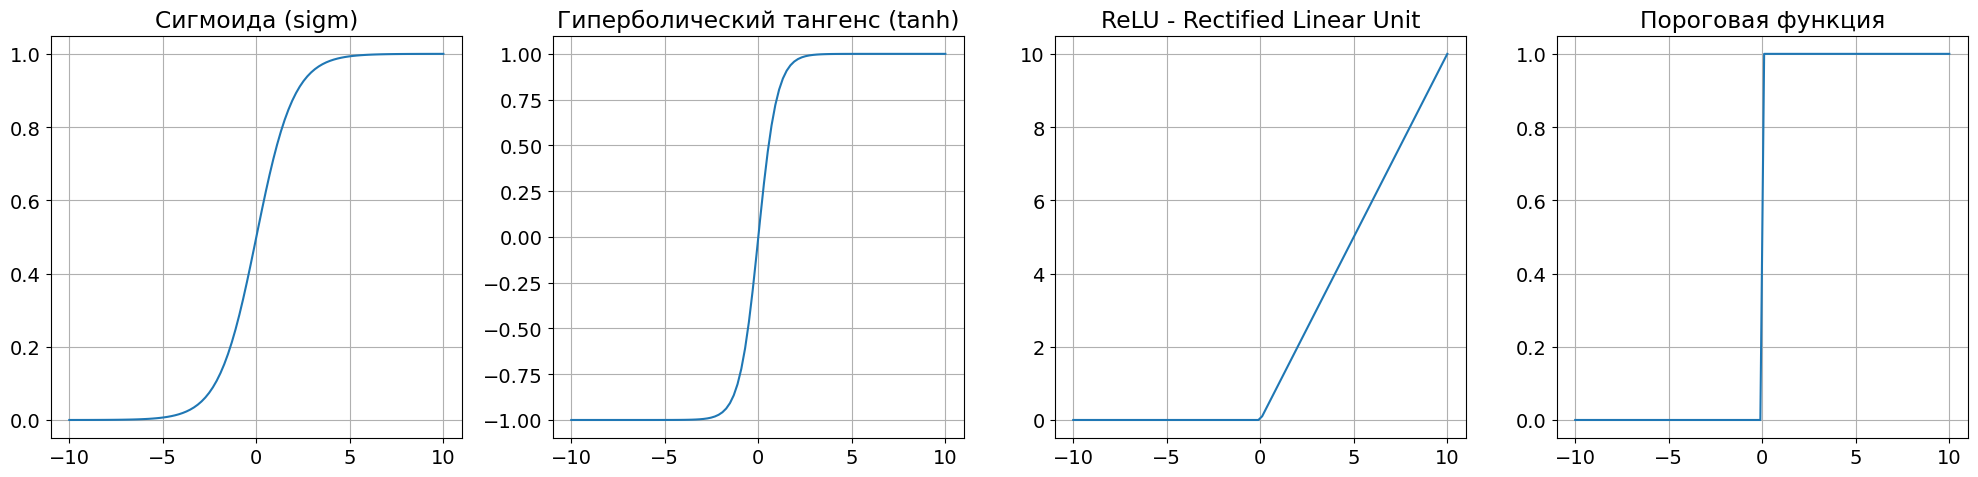

In [2]:
x = np.linspace(-10, 10, 100)

plt.figure(figsize=[20,5])
plt.subplot(141)
plt.plot(x, 1 / (1 + np.exp(-x)))
plt.title("Сигмоида (sigm)")
plt.grid()

plt.subplot(142)
plt.plot(x, np.tanh(x))
plt.title("Гиперболический тангенс (tanh)")
plt.grid()

plt.subplot(143)
plt.plot(x, np.maximum(x, 0))
plt.title("ReLU - Rectified Linear Unit")
plt.grid()

plt.subplot(144)
plt.plot(x, x>0)
plt.title("Пороговая функция")
plt.grid()

plt.tight_layout()
plt.show()

> ⚠️ Обратите внимание на оси Y - они везде разные

Давайте теперь подумаем, вот у нас есть матрица признаков $X$, мы берем вектор весов $W$ (вместе с bias $b$ в конце вектора) и умножаем их: $z=XW$.

Что мы получаем?

Да, это ж линейная регрессия! Без функции активации нейрон - это модель линейной регрессии.

<p align="center"><img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/turn.jpg"  width=300/></p>

Теперь сверху накинем сигмоиду: $y = g(XW)$.

Иии получаем модель логистической регрессии! Всё просто, правда?

Веса в нейроне работают точно также, как и в регрессиях - они указывают на то, какие входы сильнее влияют на принятие решения.

> 🤓 Вы же помните, что смысл весов мы можем рассматривать **только** если входы нормированы? Если да - отлично, нет - вспоминайте =)

Так зачем нам это знание?

Просто, чтобы вы понимали, что сам по себе нейрон - это очень простая модель. Ничего сложного, вы можете сами попрактиковаться и написать код длы вычисления результата нейрона.

А теперь мы переходим к более вкусному вопросу - **так что же такое нейросети**?

<p align="center"><img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/we_need_to_go_deeper.jpg"  width=600/></p>

## Нейросеть

Отлично, нейрон мы освоили, но честно говоря, сегодня один только нейрон нигде не применяется. Это не значит, что он бесполезен! Давайте возьмем пачку таких нейронов и выстроим в слои:

> 🤓 Нейросеть (по аналогии с мозгом) - это много соединённых нейронов между собой, поэтому для большинства нейронов выходные сигналы идут на вход другим нейронам.

> 🤓 Разработка нейросети на компьютере делает нейросеть **искусственой**, поэтому сигналами являются передаваемые числа (или уровень сигнала).

<p align="center"><img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/Images-NN.png" width=600/></p>

Целых три слоя (судя по картинке), но давайте разберёмся, почему же реальных слоев тут всё-таки *два* =)

- **Input layer (входной слой)** - обратите внимание, что каждый "нейрон" здесь имеет единственный вход. Выход на самом деле у каждого нейрона в слое один, просто он идёт на все нейроны в следующем слое.

- **Hidden layer (скрытый слой)** - он называется скрытым, потому что он не вход и не выход. Всё, что между - скрытые слои. **Каждый нейрон** в этом слое имеет столько входов, сколько нейронов у нас в предыдущем слое. В данном случае мы имеем по два входа у каждого нейрона этого слоя.

> ⚠️ Еще раз закрепим, у нейрона несколько входов, единственный bias и единственный выход.

- **Output layer (выходной слой)** - тут особенность обратная входному, полносвязное соединение с предыдущим скрытым и по одному выходу на нейрон. Но ведь у нейрона и так всегда один выход? Да, просто дальше слоев нет, поэтому на рисунке нет столько стрелочек на выходе.

Так-с, читать и понимать структуру нейросети мы научились - тут нет ничего сложного. Давайте ещё проясним, что вот такой тип нейросети называется **многослойной** и **полносвязной**. Первое означает, что слоёв больше одного, а второе - что каждый нейрон предыдущего слоя связан с каждым нейроном следующего.

Теперь, почему тут на самом деле **два слоя нейронов**, а не три? Помним, что нейрон - это веса для входов и *bias*, суммирование и функция активации? Так вот у входных "нейронов" как правило нет весов и функции активации. Ну и суммировать нечего, если во входном слое один нейрон - один вход. Это схематичное отображение того, что каждый нейрон в первом скрытом слое берёт все значения входов. Так просто на схемах проще показывать.

А что является **входом для нейросети**? Да как и для всех моделей в ML - числовые значения признаков! Раньше мы уже кодировали строки и тексты в числовые вектора. Тут то же самое, надо на вход подготовить числовые векторы.

> ⚠️ Архитектура нейросети (количество слоёв и количество нейронов в слое) являются гиперпараметрами модели. Веса нейронов (вместе с bias) - параметры, которые настраиваются в ходе обучения.


Вот тут мы и подошли к одному из важнейших факторов, которые отличают нейросети от остальных моделей. Нейрон в своей минималистичности (сумма взвешенных входов) с нелинейной функцией активации уже является *нелинейной* моделью. Если мы сложим из таких нейронов нейросеть, то получим **универсальный аппроксиматор**. Сложно? Проще - Какую бы хитрую вы функцию не выдумали (квадрат косинуса от корня экспоненты в степени икс), можно взять нейросеть достаточного размера (по количеству нейронов в ней) и она сможет аппроксимировать ее, то есть повторить зависимость $y=f(x)$.

Про универсальный аппроксиматор - это математический подход, а вот если говорить практически, то под этим понятием лежит следующее описание. Нейросеть (слои нейронов) являются **трансформаторами информации**. Они преобразуют входную информацию в альтернативное представление, которое может человек не понимает, но это позволяет нейросети работать и решать задачи.

То есть, мы на вход подаем числовой вектор, который является представление нашего примера из данных, а сеть преобразует его так, чтобы в конце принять решение по классификации (если решается задача классификации) или выдать значение уровня (если решается задача регрессии).

Ладно, хватит теории - пора понять, как делать свои нейросети и почему в чистом виде для задачи классификации мы вряд ли ими будем пользоваться =)

### А как нейросети и нейроны учатся?

Ну, мы в этом занятии этот вопрос опустим, так как он содержит под собой много теории, но главное, что важно понимать - в процессе обучения есть три этапа:
- *feedforward* - прямое распространение - это когда сеть получает входные данные, производит вычисление (распространение информации от слоя к слою) и получает результат;
- *error/loss* - вычисление ошибки - полученный результат сравнивается с истинным (*ground truth* - ведь обучение тут тоже "с учителем") и вычисляется значение функции потерь (процесс оптимизации);
- *backpropagation* - обратное распространение - вычисленная ошибка "распространяется" от последних слоев к первым с обновлением весов по ходу распространения.

> 🔥 Если вы хотите узнать больше и погрузиться в эту тему - гляньте дополнительные ссылки и спросите у преподавателя.

## Первые шаги в PyTorch

### Тензоры

Свое знакомство с нейросетями мы начнём с освоения фреймворка PyTorch. Тут нет ничего сложного, просто надо понять, что PyTorch привык работать со своим форматом массивов, поэтому мы встречаемся с первым понятием - **тензор**. По сути своей тензор ничем не отличается от массива (вектора/матрицы), тоже может иметь любое количество размерностей, но PyTorch имеет свой класс для этого, поэтому надо привыкать работать с ним.

Давайте создадим тензор единиц размером $(3, 4)$, при этом мы изначально создадим массив через numpy и затем передадим его в функцию [torch.tensor()](https://pytorch.org/docs/stable/generated/torch.tensor.html):

In [16]:
# TODO - создадим массив numpy размером (3, 4) и преобразуем в тензор с помощью функции torch.tensor()

ones_numpy = np.ones((3, 4))
ones_tensor = torch.tensor(ones_numpy)
np.testing.assert_array_almost_equal(ones_numpy, [[1,1,1,1],[1,1,1,1],[1,1,1,1]])
np.testing.assert_array_almost_equal(ones_tensor.shape, (3, 4))
assert torch.is_tensor(ones_tensor)

print("Well done!")


Well done!


In [17]:
# TEST

# Да, у тензора тоже есть атрибут .shape
np.testing.assert_array_almost_equal(ones_numpy, [[1,1,1,1],[1,1,1,1],[1,1,1,1]])
np.testing.assert_array_almost_equal(ones_tensor.shape, (3, 4))
assert torch.is_tensor(ones_tensor)

Можно было сразу создать тензор единиц с помощью [torch.ones()](https://pytorch.org/docs/stable/generated/torch.ones.html), но тут важно понять, что numpy и torch могут тесно взаимодействовать и переводить данные из одного формата в другой!

Давайте вернёмся из тензора в формат numpy:

In [32]:
import torch
import numpy as np

data_tensor = torch.tensor([[3, 4], [1, 2]])
data_numpy = data_tensor.numpy()

print(data_numpy)
print(type(data_numpy))


[[3 4]
 [1 2]]
<class 'numpy.ndarray'>


In [33]:
# TEST
assert isinstance(data_numpy, (np.ndarray))
assert not torch.is_tensor(data_numpy)

По сути своей тензоры идентичны массивам, но есть две важные особенности:
- если присмотреться к аргументу `requires_grad`, то можно выяснить, что тензоры хранят не только значения, но и величины градиентов! Эти градиенты используются при обратном распространении ошибки системой `autograd` в PyTorch.
- также имеется аргумент `device`, который управляет тем, на каком вычислителе будут производиться операции. Да-да, вот так просто можно кинуть данные на видеокарту (если есть NVidia) и выполнить операции, но не думайте, что таким образом достигается лучшая производительность.

> 🔥 Видеокарта умеет быстро выполнять большие объемы простых вычислений параллельно, а вот кидать парочку значений на сложение - не выгодно и будет дольше работать, чем на CPU!

В этом все отличия тензора, по всем операциям вы можете посмотреть [доки](https://pytorch.org/docs/stable/index.html), а мы двигаемся дальше!

### Модули

**Модули** в PyTorch - это классы, которые имеют определенный функционал обработки. Их ещё можно назвать операциями. Например, есть модуль $MSE$, модуль сигмоиды, модуль Softmax и т.д.

В чём их отличие от простых функций или классов? При разработке нейросетей, например, на основе функции потерь вычисляются градиенты, которые дальше распространяются для обновления весов. Простые функции или операции нам дадут только конкретные значения, а использование модулей в PyTorch позволяет не только запомнить, как распространялись по сети вычисления, но и вычислить необходимые градиенты.

Другой важной особенностью является абстракция аппаратного кода. Мы не задумываемся, как производить вычисления на GPU или CPU, при этом в тензоре можно задать целевую аппаратуру для использования. Модули в этом плане хороши тем, что при выполнении операций также смотрят на аппаратуру переданных тензоров и выполняют операции на той аппаратуре, на которую нацелены тензоры (заданы через `device`). Таким образом, абстракция заключается в том, что мы не пишем отдельный код для GPU и отдельный для CPU (поверьте, писать CUDA ядра для вычисления на GPU - та ещё морока), а пользуемся одними и теми же модулями без каких-либо проблем.

Давайте теперь перейдём к знакомству, и первым мы познакомимся с модулем линейного слоя [torch.nn.Linear()](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html). На деле это слой нейронов, но без функции активации:

In [34]:
from torch import nn

neurons_layer = nn.Linear(
    in_features=3,  # Количество нейронов в предыдущем слое
                    #   или количество входов нейросети, если слой первый
    out_features=2  # Количество нейронов в слое (выходов слоя)
)

Как всегда, данный класс имеет атрибуты. Подробнее можем глянуть в доках, а пока посмотрим на веса:

In [35]:
neurons_layer.weight

Parameter containing:
tensor([[-0.0043,  0.3097, -0.4752],
        [-0.4249, -0.2224,  0.1548]], requires_grad=True)

In [36]:
neurons_layer.bias

Parameter containing:
tensor([-0.0114,  0.4578], requires_grad=True)

Как видим, веса модуля тоже представлены тензором. При этом есть возможность отключить веса `bias`, чтобы слой имел только веса для входов, без смещения.

In [47]:
import torch.nn as nn

neurons_layer_no_bias = nn.Linear(in_features=5, out_features=3, bias=False)

print(neurons_layer_no_bias.bias)

print(neurons_layer_no_bias.weight)


None
Parameter containing:
tensor([[ 0.1996,  0.2168,  0.0235, -0.2293,  0.0757],
        [-0.4176, -0.3231, -0.2306,  0.2822,  0.2622],
        [-0.1983, -0.0161,  0.2860,  0.4446,  0.1775]], requires_grad=True)


In [48]:
# TEST
assert neurons_layer_no_bias.bias is None

Хорошо, мы смогли создать слой с `bias`, и без него, но как им пользоваться? Очень просто!

Модуль - это конкретная операция, поэтому всё, что нам нужно - вызвать его!

In [49]:
# Слой в три нейрона и двумя входами (данные или предыдущий слой)
layer = nn.Linear(3, 2)
# Зададим свои веса модели
layer.weight.data.fill_(1)
layer.bias.data.fill_(1)
# Создаем пример данных с одной записью и тремя признаками - размером (1, 3)
input = torch.tensor([[1.5, 2, 3]])
print(f"Input: {input}")
print(f"Weights: {layer.weight}")
print(f"Bias: {layer.bias}")

result = layer(input)
print(f"\nResult: {result}")

manual_result = input @ layer.weight.T + layer.bias
print(f"\nManual result: {manual_result}")

Input: tensor([[1.5000, 2.0000, 3.0000]])
Weights: Parameter containing:
tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
Bias: Parameter containing:
tensor([1., 1.], requires_grad=True)

Result: tensor([[7.5000, 7.5000]], grad_fn=<AddmmBackward0>)

Manual result: tensor([[7.5000, 7.5000]], grad_fn=<AddBackward0>)


Шикарно, мы использовали модуль и затем проверили, что всё работает корректно!

Смотрите, в тензоре ещё есть атрибут `grad_fn`. На самом деле это как раз специфика модулей и применяемых тензоров. При использовании модуля он сразу вычисляет необходимые для градиента данные, а тензор может хранить информацию об этом градиенте, чтобы в дальнейшем использовать её для обратного распространения ошибки. Вот так красиво можно не волноваться о градиенте и обучении, а просто заниматься разработкой кода и анализом данных!

Пора бы нам уже обучить нашу первую нейросеть на PyTorch!

## Наша первая нейросеть

<p align="center"><img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/first_nn.png" width=600/></p>

### Веса слоя нейросети - их первые значения

Инициализация весов нейросети - это вообще очень большой вопрос и на эту тему есть много статей! Мы его здесь рассматривать не будем, но обратите внимание, что PyTorch решает эту проблему за вас!

Вы скажете, а чего не установить все веса в значение 0? Ведь это просто и понятно!

Такой подход является проблемой для дальнейшей работы. Проблема называется "**проблема симметрии**" и она очень сильно влияет на работу нейросети. Об этом с примером можно прочитать [здесь](https://www.quora.com/Why-dont-we-initialize-the-weights-of-a-neural-network-to-zero) и на многих других ресурсах! Именно поэтому при работе веса часто инициализируются случайными числами из некоторого распределения.

Сейчас мы создадим пачку точек (данных), чтобы научиться строить и работать с ними в PyTorch!

> Не забывайте, что реальная работа с данными и обучение моделей предполагает разделение на выборки:
- обучениe - для тренировки моделей;
- валидация - для настройки гиперпараметров модели;
- тест - для окончательной оценки модели.

> В данной практике мы пропустим вопросы предобработки данных, тем не менее учитывайте, что использование модели в виде нейросети не сильно отличается в отношении подготовки данных и стандартизации!

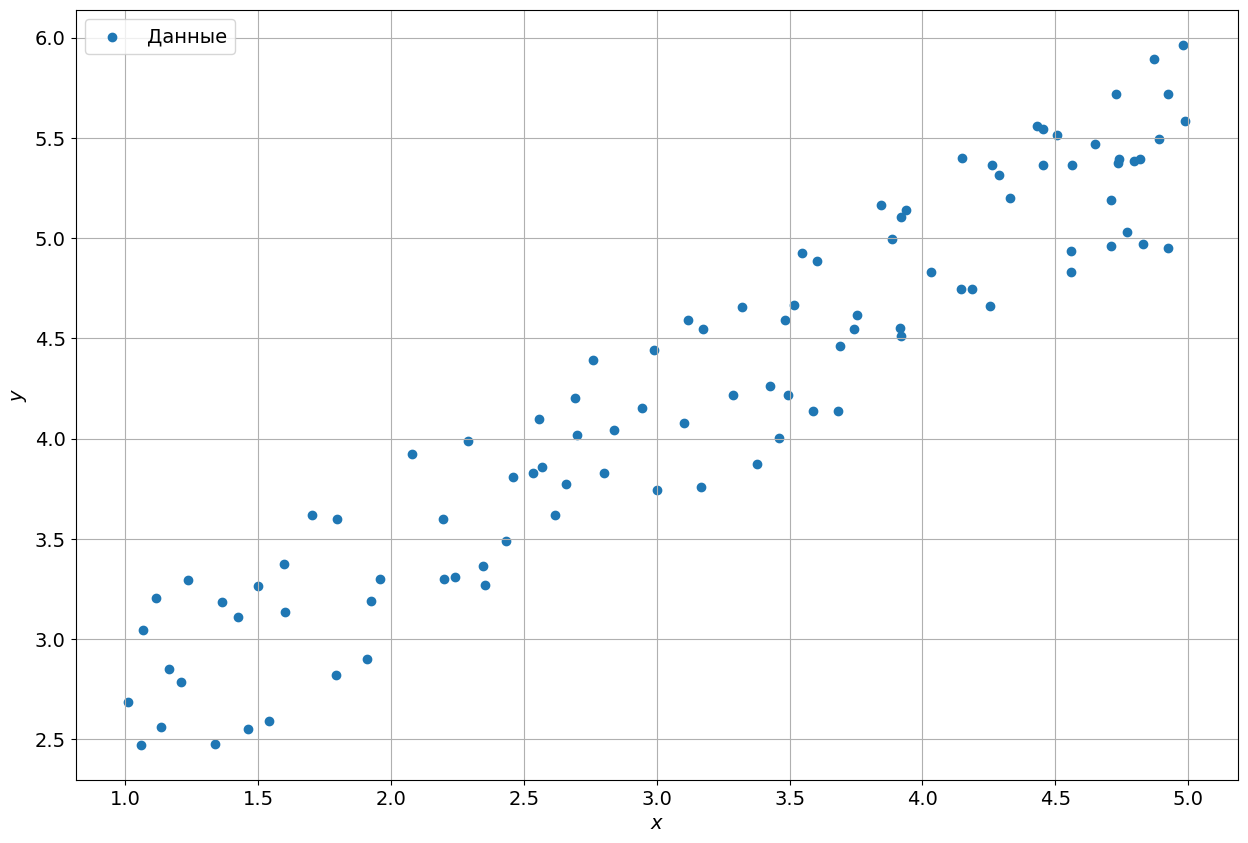

In [50]:
n_points = 100

rng = np.random.default_rng(RANDOM_STATE)

real_W = [2, 0.7]
X_data = 4*np.sort(rng.random((n_points, 1)), axis=0)+1
noize = 1*(rng.random((n_points, 1))-0.5)
y_data_true = real_W[0] + real_W[1]*X_data
y_data_noized = y_data_true + noize
y_data = y_data_noized[:, 0]

X_render = np.linspace(X_data[:, 0].min(), X_data[:, 0].max(), 100)
y_render = real_W[0] + real_W[1]*X_render

plt.scatter(X_data, y_data_noized, label="Данные")
plt.ylabel("$y$")
plt.xlabel("$x$")
plt.grid()
plt.legend()
plt.show()

Начнём как всегда с простого, получение предсказаний и оценка (визуальная и численная):

In [51]:
# Мы будем добавлять строку задания seed при каждом создании слоя,
#   чтобы зафиксировать случайные числа при инициализации весов
torch.manual_seed(RANDOM_STATE)

# Создаём слой из одного нейрона в слое и одного входа
#   У слоя не будет активации (можно назвать "линейной" активацией)
model = nn.Linear(1, 1)
# Переводим данные в формат тензора
#   Приводим к типу float методом .float()
X_tnsr = torch.tensor(X_data).float()
y_true_tnsr = torch.tensor(y_data).float()

# Исполняем слой - получаем предсказание
y_pred_tnsr = model(X_tnsr)

# Создаём модуль оценки loss методом MSE и оцениваем
loss_mod = nn.MSELoss()
loss_value = loss_mod(y_pred_tnsr, y_true_tnsr)

print(loss_value)

tensor(14.9454, grad_fn=<MseLossBackward0>)


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Глядите, результат оценки loss - это тоже тензор одиночного значения с информацией о градиенте! Если нам нужно использовать его с другими тензорами, то так и оставляем, а для того, чтобы просто получить скалярное значение, то можно воспользоваться методом [torch.Tensor.item()](https://pytorch.org/docs/stable/generated/torch.Tensor.item.html):

In [52]:
loss_scalar = loss_value.item()
print(f"Scalar value: {loss_scalar}")

Scalar value: 14.945365905761719


Отлично, эти методы полезны, когда мы работаем с тензорами! Теперь осталось посмотреть на наши данные c предсказаниями:

In [53]:
def plot_model(X, y_pred, y_true):
    plt.scatter(X, y_true, label="Данные")
    plt.plot(X, y_pred, "k--", label="Предсказание модели")
    plt.ylabel("$Y$")
    plt.xlabel("$X$")
    plt.grid()
    plt.legend()
    plt.show()

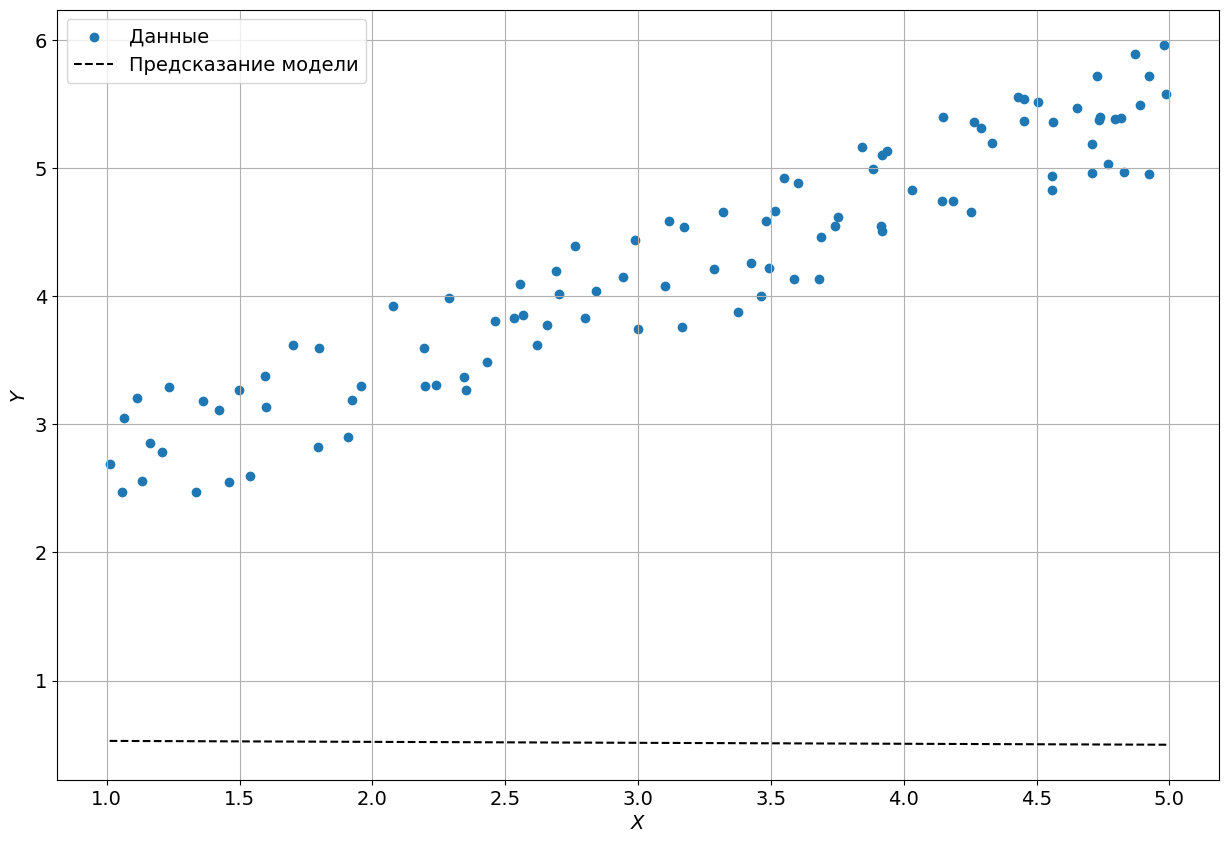

In [54]:
# Переводим обратно в формат numpy
#   .detach() нужен, чтобы отсоединить информацию о градиенте
#   без этого будет ошибка - можете попробовать проверить
y_pred = y_pred_tnsr.detach().numpy()

plot_model(X_data, y_pred, y_data)

Как и ожидалось, случайные веса в нейросети не дают ожидаемого результата. Пора научиться обучать сеть!

> В PyTorch с фиксацией случайных чисел есть неопределенности, поэтому от запуска к запуску веса, а соответсвенно и предсказания, могут отличаться - не пугайтесь.

Что мы сейчас знаем:
- Как преобразовать данные в формат тензора
- Как создать однослойную нейронную сеть (пока что один нейрон в слое)
- Как оценить функцию потерь встроенными инструментами
- Как преобразовать данные из тензора в специальных случаях (отсоединение градиента и получение скаляра)

> Если вы чего-то из этого списка не помните - лучше вернуться и повторить!

### Обучение нейросети

Хорошо, предсказания и оценка Loss получены, теперь остался вопрос, а как в PyTorch сделать обновление весов?

Делается это в несколько шагов:
- Нам нужно, чтобы все нейроны получили информацию о градиентах, делается это методом [torch.Tensor.backward()](https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html) тензора `loss_value`, так как градиент рассчитывается на основе функции потерь;
- Нужно обновить веса в каждом нейроне, для этого:
    - Создадим объект алгоритма оптимизации, мы раньше использовали Gradient Descent, здесь мы используем его модификацию - Stochastic Gradient Descent ([torch.optim.SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html)). Хорошее описание различных методов оптимизации есть [здесь](https://ruder.io/optimizing-gradient-descent/).
    - Чтобы он знал, какие параметры оптимизировать, во время создания объекта оптимизатора передадим ему параметры модели;
    - После вычисления loss распространим градиент и выполним шаг оптимизатора [torch.optim.SGD.step()](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html);
    - Обнулим градиенты на слоях, потому что с каждым вызовом [torch.Tensor.backward()](https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html) градиенты складываются.

Давайте проверим это, сделав один шаг обучения:

In [85]:
import torch
import torch.nn as nn
import numpy as np

RANDOM_STATE = 42

def create_model():
    torch.manual_seed(RANDOM_STATE)

    return model

In [86]:
# TEST

_test_model = create_model()
_test_weights = _test_model.weight.detach()
np.testing.assert_array_almost_equal(_test_weights, [[-0.007487]])

In [87]:
# Поехали!

model = create_model()
# Создадим объект Stochastic Gradient Descent
optimizer = torch.optim.SGD(
    params=model.parameters(),  # Параметры модели
    lr=0.01                    # Коэффициент обучения
)
loss_op = nn.MSELoss()

X_tnsr = torch.tensor(X_data).float()
y_true_tnsr = torch.tensor(y_data).float()
# Метод .view() - аналог np.reshape()
y_true_tnsr = y_true_tnsr.view((X_tnsr.shape[0], -1))

y_pred_tnsr = model(X_tnsr)
loss_value = loss_op(y_pred_tnsr, y_true_tnsr)
print(f"Loss  before: {loss_value}")
print(f"Weights before: {model.weight}")

# Обнуляем градиенты в модели
optimizer.zero_grad()
# Делаем распространение градиентов
loss_value.backward()
# Делаем шаг оптимизации - обновление весов
optimizer.step()

print("---------------------")

y_pred_tnsr_new = model(X_tnsr)
loss_value_new = loss_op(y_pred_tnsr_new, y_true_tnsr)
print(f"Loss after: {loss_value_new}")
print(f"Weights after: {model.weight}")

Loss  before: 14.961259841918945
Weights before: Parameter containing:
tensor([[-0.0075]], requires_grad=True)
---------------------
Loss after: 8.503297805786133
Weights after: Parameter containing:
tensor([[0.2537]], requires_grad=True)


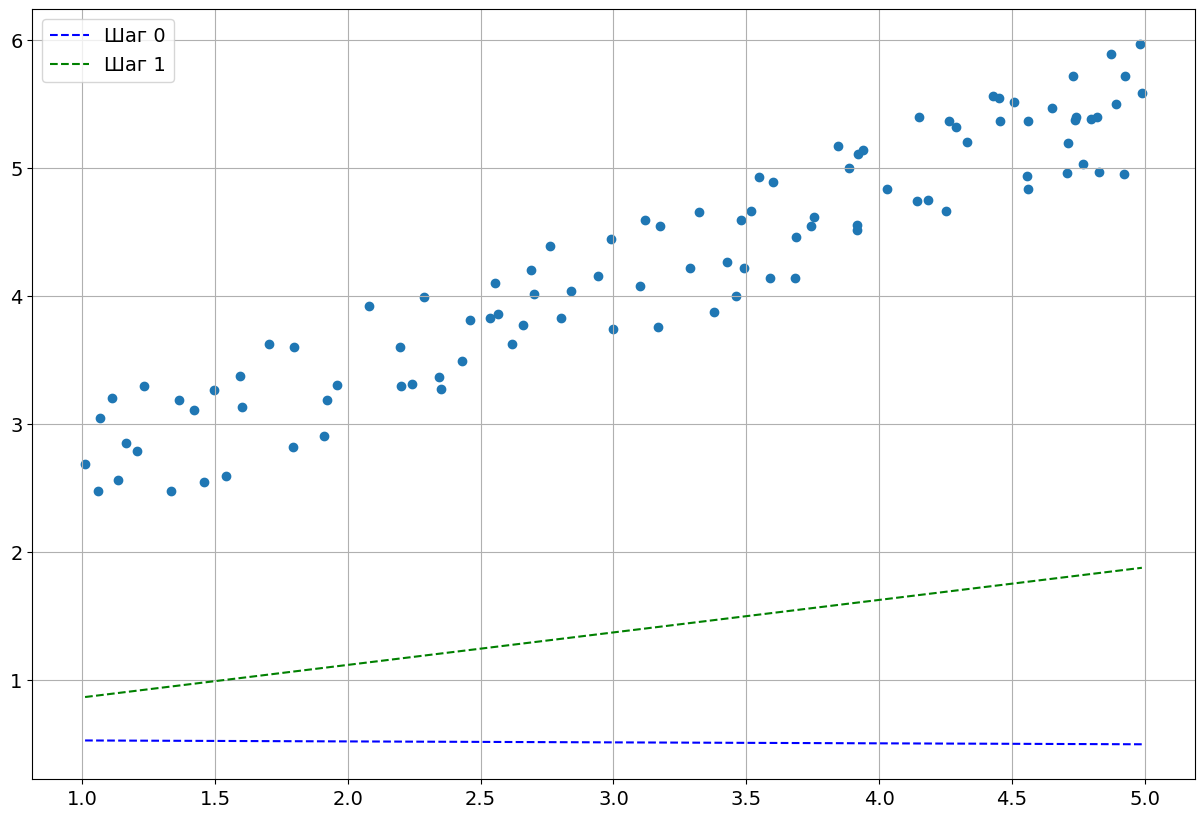

In [88]:
# Отобразим данные и предсказания

y_pred_0 = y_pred_tnsr.detach().numpy()
y_pred_1 = y_pred_tnsr_new.detach().numpy()

plt.scatter(X_data, y_data)
plt.plot(X_data, y_pred_0, "b--", label="Шаг 0")
plt.plot(X_data, y_pred_1, "g--", label="Шаг 1")

plt.legend()
plt.grid()
plt.show()

Как видно по числам и графику - шаг оптимизации прошёл успешно! Линия стала ближе к данным, а значит веса обновляются в верном направлении!


Теперь давайте представим нашу систему в виде графа вычислений:

<p align="center"><img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/Images-NN_CompGraph.png" width=600/></p>

Здесь
* ребра (стрелки) - тензоры,
* узлы (прямоугольники) - модули.

По сути после каждой операции тензор-результат получает `grad_fn`, по которой можно обратно распространить ошибку и **обновить параметры в модуле**, если они есть.
> Например, в `nn.MSELoss()` нечего обновлять, но при этом он участвует в вычислениях и учитывается, если распространять градиент от `loss_value`.

Так мы разобрались, зачем тензору атрибут `grad_fn`.

А теперь фокус, что происходит, если на вход `nn.MSELoss()` мы подадим `y_pred_tnsr`, но перед этим сделаем `y_pred_tnsr = y_pred_tnsr.detach()`?

Давайте проверим:

In [89]:
# Сделаем предсказание и вычислим loss
y_pred_tnsr = model(X_tnsr)
y_pred_tnsr = y_pred_tnsr.detach()
loss_value = loss_op(y_pred_tnsr, y_true_tnsr)

optimizer.zero_grad()
try:
    loss_value.backward()
    optimizer.step()
except Exception as e:
    print(f"Error happened: {e}")


Error happened: element 0 of tensors does not require grad and does not have a grad_fn



Всё просто: после вычисления, если мы распространим ошибку методом `.backward()`, то `nn.Linear()` не получит обновления параметров (будет ошибка), так как `y_pred_tnsr` является связующим, а мы у него удалили информацию о градиенте!

Вот так в PyTorch происходит распространение ошибок и оптимизация параметров для минимизации скалярного тензора, от которого делается `.backward()`. Именно поэтому мы делаем обратное распространение от значения функции потерь!

### Продолжаем обучать нейросеть

Давайте теперь напишем функцию обучения, которой передадим модель, оптимизатор и на выходе хотим получить историю функции потерь

In [100]:
import torch
import torch.nn as nn
import numpy as np


def fit_model(model, optim, loss_op, X: np.ndarray, y: np.ndarray, n_iter: int):
    """
    Обучает модель и возвращает историю значений функции потерь.

    Args:
        model: Модель для обучения.
        optim: Оптимизатор.
        loss_op: Функция потерь.
        X: Матрица данных (NumPy array).
        y: Вектор целевых значений (NumPy array).
        n_iter: Количество эпох обучения.

    Returns:
        Список значений функции потерь на каждой эпохе.
    """

    loss_values = []
    X = torch.from_numpy(X).float()
    y = torch.from_numpy(y).float().unsqueeze(1)

    for _ in range(n_iter):

        predictions = model(X)


        loss = loss_op(predictions, y)
        loss_values.append(loss.item())


        optim.zero_grad()
        loss.backward()
        optim.step()

    return loss_values




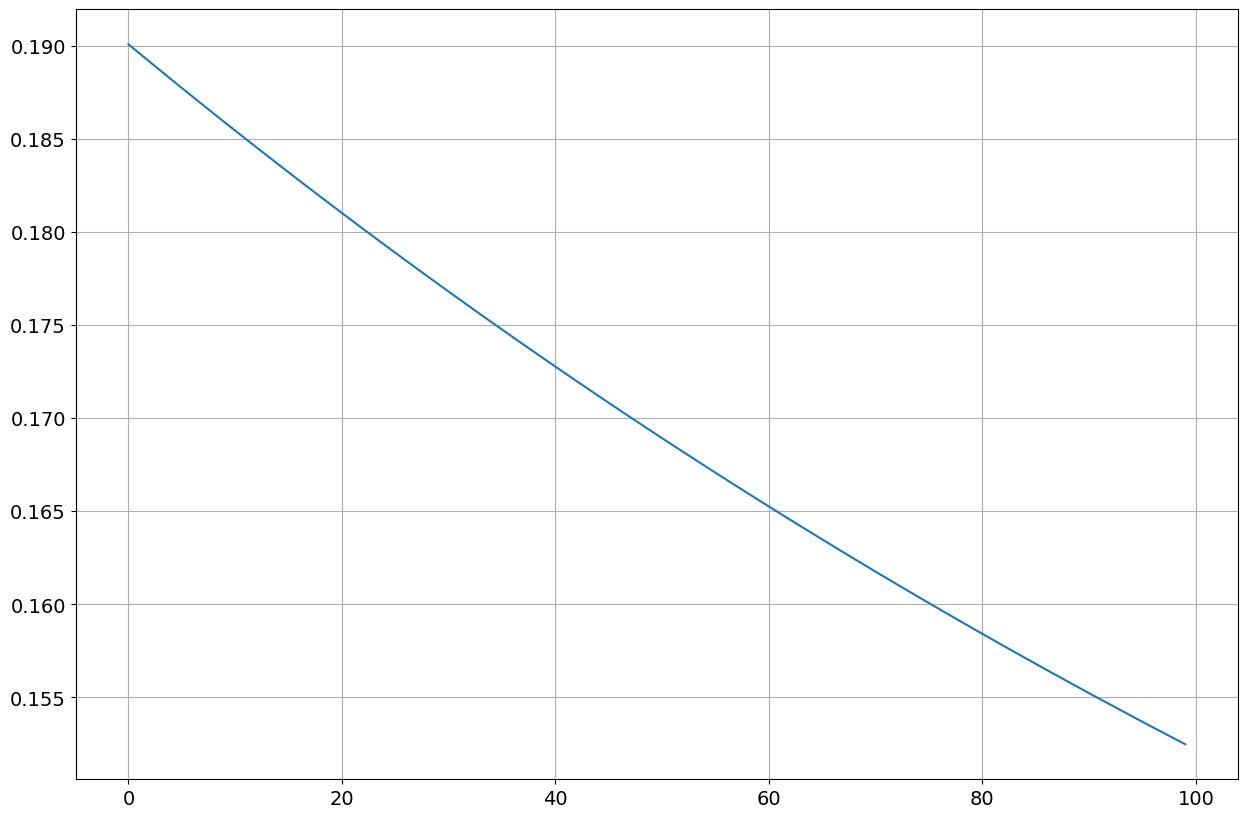

In [101]:
# TEST
model = create_model()
# Создадим объект Stochastic Gradient Descent
optimizer = torch.optim.SGD(
    params=model.parameters(),
    lr=0.01
)
loss_op = nn.MSELoss()

loss_history = fit_model(
    model=model,
    optim=optimizer,
    loss_op=loss_op,
    X=X_data,
    y=y_data,
    n_iter=100
)

assert loss_history[-1] < 0.22

plt.plot(loss_history)
plt.grid()
plt.show()

Замечательно, по графику потерь на обучающей выборке наша модель учится и становится всё лучше с каждой пройденной эпохой (итерацией обучения). Правда, примерно с 10 эпохи обучение приостанавливается и лучше не становится.

А теперь, когда мы  умеем рисовать график обучения - давайте разберёмся, как влияет параметр "коэффициент обучения"?

### Задание - изучаем коэффициент обучения (learning rate)

Проверьте обучение модели при разных `lr` из списка `[0.1, 0.01, 0.001]` и отобразите графики обучения. Напишите свои выводы

**Выводы**:


## Что такое batch и как мне предсказать своё значение?

> 🤓 **Batch** - пакет данных. Нейросети по умолчанию работают батчами, то есть пакетами данных.

Смотрите, раньше мы подавали на вход метода обучения, например леса, все данные. Например, примеров в данных было 1000. Таким образом, мы подавали батч размером 1000.

> Работа с нейросетями обычно применяется на оооооооочень больших данных и на GPU, где бывает не так много памяти (видео), как оперативной. Поэтому, мы не можем подавать на вход все-все данные, а должны разделить их на более маленькие пакеты - по 256/128/32 примеров (обычно берутся степени двойки).

Буквально сейчас мы учили сеть с форматом входного батча NхM, где N - количество данных в батче (все данные, 100 записей), M - количество признаков в данных (в нашем случае 1). Выходной батч имел формат Nх1, то есть N предсказаний (по размеру входа) и 1 колонка с предсказанным значением.

По сути сейчас ничего особо нового, просто особенности терминологии, так как ранее мы тоже подавали на вход моделей 2D массивы. В случае работы с изображениями мы узнаем, что батч может иметь больше двух размерностей и не всегда данные подаются разом, так как вряд ли нам хватит памяти, чтобы загрузить миллион изображений в память.

Так вот, так как мы знаем, что вход нейросети предполагает определённый формат пакета, то для случая, если, например, мы захотим предсказать значение для некоторого нового вектора признаков (новая запись данных), то нам нужно привести к требуемому формату:

In [102]:
# Возьмём к примеру случай, когда у нас три признака в данных
x_new_sample = [1, 2, 3]
new_tnsr = torch.tensor(x_new_sample, dtype=torch.float)
print(new_tnsr.shape)
# Сейчас запись имеет формат M - кол-во признаков
# Чтобы привести его к формату NхM, мы должны добавить
#   ещё одну размерность методом .unsqueeze()

# Передали аргумент 0, чтобы размерность добавилась в начале
new_batch = new_tnsr.unsqueeze(0)
print(new_batch.shape)

torch.Size([3])
torch.Size([1, 3])


In [118]:
import torch

def preprocess_vector(x: list):
    x_tensor = torch.tensor(x, dtype=torch.float32).view(1, -1) # <-- Изменено здесь
    return x_tensor

_test_tnsr = preprocess_vector([1, 2, 3, 4])
assert torch.is_tensor(_test_tnsr)
np.testing.assert_array_almost_equal(_test_tnsr.shape, (1, 4))
np.testing.assert_array_almost_equal(_test_tnsr, np.array([[1, 2, 3, 4]], dtype=np.float32))

print("Test passed!")


Test passed!


In [119]:
# TEST

_test_tnsr = preprocess_vector([1, 2, 3, 4])
assert torch.is_tensor(_test_tnsr)
np.testing.assert_array_almost_equal(_test_tnsr.shape, (1, 4))
np.testing.assert_array_almost_equal(_test_tnsr, np.array([[1, 2, 3, 4]], dtype=np.float32))

После добавления размерности, если данные уже предобработаны (стандартизированы, сгруппированы и т.д.), то можно подавать батч (хоть и из одной записи) на вход модели!

Output shape: torch.Size([1, 1])
Output value: 3.0878067016601562


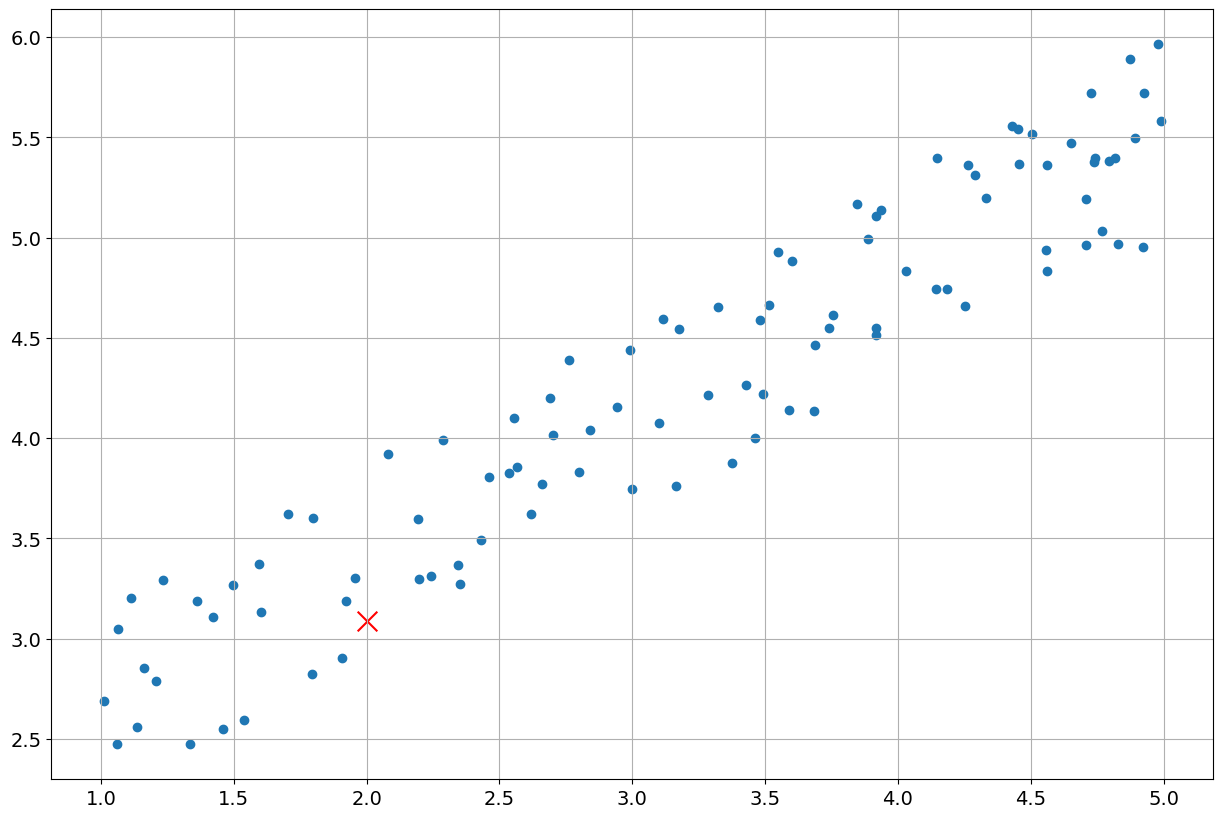

In [120]:
x_new = [2]
in_data = preprocess_vector(x_new)

y_pred = model(in_data)
# Этим принтом увидим, что выход является тоже батчем
print(f"Output shape: {y_pred.shape}")
print(f"Output value: {y_pred.item()}")

# Отсоединим градиент и переведём в формат numpy
y_pred = y_pred.detach().numpy()
# Так как батч имеет единственную запись - заберём данные из него
y_pred = y_pred[0]

plt.scatter(X_data, y_data)
plt.scatter(x_new, y_pred, marker="x", color="r", s=200)
plt.grid()
plt.show()

Видите красный крестик? Вот так модель предсказывает новые данные и при этом один (наш красный крестик) достаточно близок к данным.

Таким незамысловатым образом мы смогли получить предсказания по нашим новым данным и узнали, что такое **батчи** в нейросетях.

## Выводы - задание

Вопрооооосики!

1. Из каких частей состоит нейрон?
2. Может ли нейрон быть без функции активации? Что из этого получится (какой характер сети)?
3. Можно ли в качестве функции активации выбрать кусочно-линейную функцию с разрывами?
4. Почему лучше не использовать функцию параболы в качестве функции активации?
5. Что такое learning rate и как он влияет на обучение?
6. Какой процесс описывает получение ошибки предсказания?

## Полезные ссылки
* [Backpropagation algorithm with visualization](https://developers-dot-devsite-v2-prod.appspot.com/machine-learning/crash-course/backprop-scroll/)
* [Backpropagation explained (YouTube)](https://www.youtube.com/watch?v=Ilg3gGewQ5U)
